# Problem Set 4
# MACS 30100
# Dr. Rick Evans
# Kevin Sun
# February 5, 2018

## 1) Multiple Linear Regression

### 1a)

In [8]:
import pandas as pd

# read in the csv file
df = pd.read_csv("Auto.csv", na_values = "?")
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [10]:
# remove the na values
df.dropna(inplace = True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

### 1b)

<IPython.core.display.Javascript object>


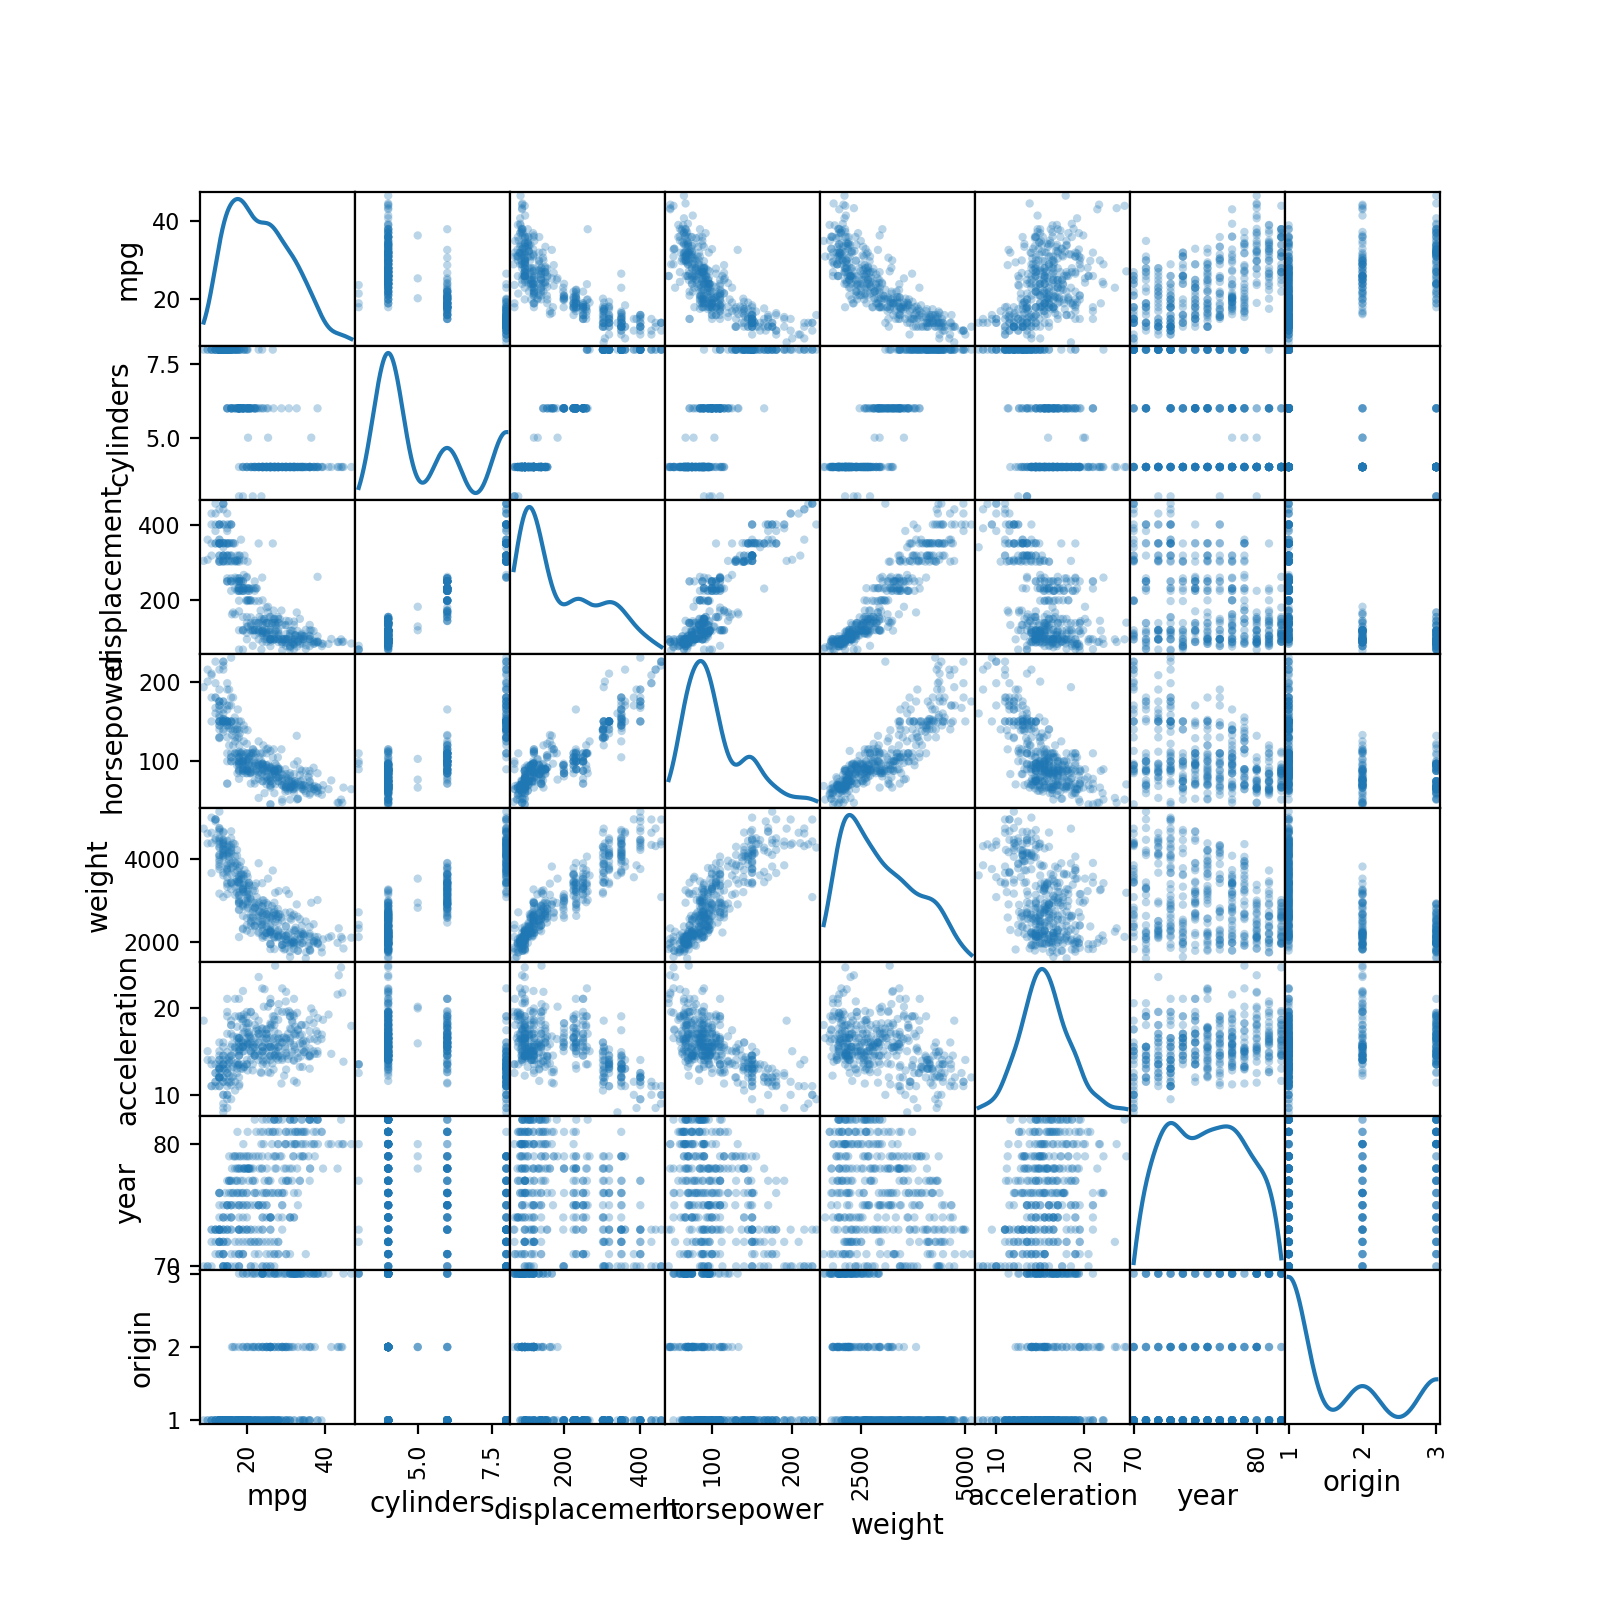

In [20]:
from pandas.plotting import scatter_matrix
# filter out non-numeric information from the dataframe
df_quant = df.drop(['name'], axis=1)

# plot a scatter matrix of df_quant
%matplotlib notebook
sm = scatter_matrix(df_quant, alpha=0.3, figsize=(8, 8),diagonal= 'kde')

### 1c)

In [21]:
# Compute the correlation matrix
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### 1d)

In [29]:
import statsmodels.api as sm
# estimating the multiple linear regression model
df['constant'] = 1
regression = sm.OLS(endog=df['mpg'], exog=df[['constant', 'cylinders', 'displacement',\
                                             'horsepower', 'weight', 'acceleration',\
                                             'year', 'origin']], missing='drop')
results = regression.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        15:33:38   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.2184      4.644     -3.707   

(i) Which coefficients are statistically significant at the 1% level?

Displacement, weight, year, and origin are all statistically significant at the 1% level.

(ii) Which coefficients are not statistically significant at the 10% level?

Cylinders, horsepower, and acceleration are not statistically significant at the 10% level.

(iii) Give interpretation of the estimate coefficient on year.

There is a positive relationship between the year of the vehicle and the miles per gallon for that vehicle. For each successive year model of the vehicle, the miles per gallon increases by roughly 0.75 miles. This means that newer vehicles tend to have better gas mileage. 



### 1e)

In [32]:
# Estimating a new linear regression with squared terms of displacement, horsepower,
# weight, and acceleration

df['displacement_squared'] = df['displacement']*df['displacement']
df['horsepower_squared'] = df['horsepower']*df['horsepower']
df['weight_squared'] = df['weight']*df['weight']
df['acceleration_squared'] = df['acceleration']*df['acceleration']

df['constant'] = 1
regression = sm.OLS(endog=df['mpg'], exog=df[['constant', 'cylinders', 'displacement', \
                                              'displacement_squared', 'horsepower',\
                                              'horsepower_squared', 'weight', 'weight_squared',\
                                              'acceleration_squared','acceleration',\
                                             'year', 'origin']], missing='drop')
results2 = regression.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        16:07:30   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
constant                20.1084 

(ii) The adjusted R-squared statistic from this new model is 0.866. This is higher than the adjusted R-squared from the first model which was 0.818.

(iii) Displacement is no longer statistically significant and displacement_squared is not statistically significant either.

(iv) The cylinders coefficient continues to not be significant, although the sign on the coefficient did change from negative to positive. Intuitively, this does not seem to make sense given that vehicles with more cylinders tend to achieve fewer miles per gallon.

### 1f)

In [35]:
# predicting the mileage of a vehicle of a particular specification 
prediction = results2.predict(exog=[1, 6, 200, 200**2, 100, 100**2, 3100, 3100**2, 15**2, 15, 99, 1])

print("The predicted miles per gallon mpg of a car with \
6 cylinders, displacement of 200, horsepower of 100, a weight of 3100, \
acceleration of 15.1, model year of 1999, and origin of 1 is:\n", prediction, "miles per gallon.")

The predicted miles per gallon mpg of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3100, acceleration of 15.1, model year of 1999, and origin of 1 is:
 [ 38.76772272] miles per gallon.


## 2) Classification: KNN 

### 2a)

In [37]:
# compute the Euclidean Distance between points
import numpy as np
def calculate_distance(observations):
    x1, x2, x3 = observations
    return np.sqrt(x1**2 + x2**2 + x3**2)

observations  = [[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]]
for point in observations:
    print(calculate_distance(point))

3.0
2.0
3.16227766017
2.2360679775
1.41421356237
1.73205080757


### 2b)

For K=1 our K Nearest Neighbor prediction is Green. We look at the closest observation in the sample to (0,0,0). This single closest observation is at point (-1,0,1) and is green. 

### 2c)

For K=3 our K Nearest Neighbor prediction is Red. We look at the 3 closest observations in the sample to (0,0,0). These observations are (2,0,0), (-1,0,1), and (1,1,1) which are red, green, and red respectively. Thus, our prediction is red given that most of these neighbors are red.

### 2d)

If the Bayes optimal decision boundary is highly non-linear then we would expect the best value of K to be small. Using a high value for K would underfit the data, result in a relatively straight contour line, and ignore information. 

### 2e)

In [38]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors = 2)
X = observations
Y = ["Red", "Red", "Red", "Green", "Green", "Red"]
knn.fit(X, Y)
result = knn.predict([[1,1,1,]])
print(result[0])

Green


In [40]:
knn.kneighbors([[1, 1, 1]])

(array([[ 0.        ,  1.41421356]]), array([[5, 3]]))

The nearest neighbor to (1,1,1) are points (1,1,1) and (0,1,2). Since the former point is closer at a distance of 0, then the predicted color will be the same as this point. This is red.

## 3) Multivariate Logit Regression

In [42]:
def mpg_high(mpg):
    med = df["mpg"].median()
    if mpg >= med:
        mpg_high = 1
    else:
        mpg_high = 0
    return mpg_high

df["mpg_high"] = df["mpg"].apply(mpg_high)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,constant,displacement_squared,horsepower_squared,weight_squared,acceleration_squared,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1,94249.0,16900.0,12278016,144.00,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1,122500.0,27225.0,13638249,132.25,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1,101124.0,22500.0,11806096,121.00,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1,92416.0,22500.0,11785489,144.00,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1,91204.0,19600.0,11895601,110.25,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,1,184041.0,39204.0,18844281,100.00,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,1,206116.0,48400.0,18957316,81.00,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,1,193600.0,46225.0,18593344,72.25,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,1,207025.0,50625.0,19580625,100.00,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,1,152100.0,36100.0,14822500,72.25,0


### 3a)

In [48]:
exog_var = ["constant","cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]
Logit_Model = sm.Logit(endog = df["mpg_high"], exog = df[exog_var])
result = Logit_Model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        11:14:09   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Both weight and year have a p-value of 0.000 which is statistically significant at the 5% level.

### 3b)

In [55]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
# divide the data into training and test data
Y = df["mpg_high"]
X = np.column_stack((df["constant"], df["cylinders"], df["displacement"], df["weight"], df["horsepower"],
                     df["acceleration"], df["year"], df["origin"])) 

# This function train_test_split is from sklearn.cross_validation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5,
                                                    random_state=10)

### 3c)

In [61]:
Log_Reg = LogisticRegression()
lr_result = LogReg.fit(X_train, y_train)
intercept = lr_result.intercept_
coefficients = lr_result.coef_
print("y-intercept is:", intercept)
print("coefficients are:", coefficients)

y-intercept is: [-0.07397622]
coefficients are: [[-0.07397622 -0.7103432   0.00673688 -0.00509354 -0.03656109 -0.12764383
   0.29902534 -0.15983507]]


### 3d)

In [62]:
# creating predicted values
y_pred = LogReg.predict(X_test)

In [63]:
# creating the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



The differences between lower mpg and higher mpg appear to be trivial. Lower mpg could arguably be considered marginally better. 